<a href="https://colab.research.google.com/github/nefiya-nefiz/CloudCredits/blob/main/HR_ANALYTICS_TO_TRACK_EMPLOYEE_PERFORMANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

The HR Analytics dataset is designed to analyze employee data and predict performance ratings based on various attributes. This documentation provides an overview of the dataset, including features, data sources, preprocessing steps, and the methodology for predictive analysis.The dataset consists of employee records collected from an organization, capturing demographic details, job-related attributes, and performance evaluation metrics.

# **IMPORT LIBRARIES**

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

# **Input CSV file by using Pandas**

In [222]:
df=pd.read_csv("hr_analytics.csv")
df

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
0,1,22-03-2022,10-12-1966,Non-Binary,HR,Sales promotion account executive,Active,115,Michelle Dennis,VP,...,1,1.45,Low,Non-Diverse,50.26,1152.71,14,Yes,50,6.63
1,2,11-01-2020,15-12-1965,Non-Binary,HR,Sales executive,Terminated,419,Thomas Nelson,Director,...,2,1.40,Medium,Diverse,97.90,2810.24,23,Yes,50,5.68
2,3,30-10-2024,06-08-1964,Female,Marketing,"Research officer, trade union",Active,241,Miranda Barnes,Director,...,5,4.46,Medium,Non-Diverse,78.61,5945.55,39,No,55,8.51
3,4,18-11-2020,03-05-2001,Non-Binary,Marketing,Soil scientist,On Leave,765,Cheryl Kelley,Director,...,2,1.09,Medium,Non-Diverse,95.29,7837.52,25,Yes,56,3.34
4,5,13-05-2023,27-09-1993,Non-Binary,HR,Automotive engineer,Active,792,Maria Jenkins,VP,...,1,3.21,High,Diverse,70.09,1638.29,46,No,57,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,26-10-2018,11-10-1971,Non-Binary,Sales,Energy engineer,On Leave,815,Kaylee Edwards,VP,...,5,3.99,High,Diverse,69.31,4218.32,33,Yes,31,9.83
49996,49997,07-10-2017,27-04-1977,Non-Binary,Finance,"Administrator, arts",On Leave,511,Raymond Rogers,Manager,...,2,4.86,Medium,Non-Diverse,65.73,6192.78,32,Yes,56,6.66
49997,49998,16-10-2023,02-01-1984,Non-Binary,Sales,"Biochemist, clinical",On Leave,359,Sarah Schroeder,VP,...,4,1.97,Medium,Diverse,66.81,4299.03,45,No,51,7.10
49998,49999,22-09-2017,28-01-1985,Non-Binary,HR,Careers information officer,On Leave,281,Lisa Valentine,VP,...,5,2.98,Low,Non-Diverse,58.21,9425.87,52,Yes,31,8.39


# **DATA PREPROCESSING AND EDA**

In [223]:
df.head()

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
0,1,22-03-2022,10-12-1966,Non-Binary,HR,Sales promotion account executive,Active,115,Michelle Dennis,VP,...,1,1.45,Low,Non-Diverse,50.26,1152.71,14,Yes,50,6.63
1,2,11-01-2020,15-12-1965,Non-Binary,HR,Sales executive,Terminated,419,Thomas Nelson,Director,...,2,1.40,Medium,Diverse,97.90,2810.24,23,Yes,50,5.68
2,3,30-10-2024,06-08-1964,Female,Marketing,"Research officer, trade union",Active,241,Miranda Barnes,Director,...,5,4.46,Medium,Non-Diverse,78.61,5945.55,39,No,55,8.51
3,4,18-11-2020,03-05-2001,Non-Binary,Marketing,Soil scientist,On Leave,765,Cheryl Kelley,Director,...,2,1.09,Medium,Non-Diverse,95.29,7837.52,25,Yes,56,3.34
4,5,13-05-2023,27-09-1993,Non-Binary,HR,Automotive engineer,Active,792,Maria Jenkins,VP,...,1,3.21,High,Diverse,70.09,1638.29,46,No,57,3.34


In [224]:
df.tail()

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
49995,49996,26-10-2018,11-10-1971,Non-Binary,Sales,Energy engineer,On Leave,815,Kaylee Edwards,VP,...,5,3.99,High,Diverse,69.31,4218.32,33,Yes,31,9.83
49996,49997,07-10-2017,27-04-1977,Non-Binary,Finance,"Administrator, arts",On Leave,511,Raymond Rogers,Manager,...,2,4.86,Medium,Non-Diverse,65.73,6192.78,32,Yes,56,6.66
49997,49998,16-10-2023,02-01-1984,Non-Binary,Sales,"Biochemist, clinical",On Leave,359,Sarah Schroeder,VP,...,4,1.97,Medium,Diverse,66.81,4299.03,45,No,51,7.10
49998,49999,22-09-2017,28-01-1985,Non-Binary,HR,Careers information officer,On Leave,281,Lisa Valentine,VP,...,5,2.98,Low,Non-Diverse,58.21,9425.87,52,Yes,31,8.39
49999,50000,18-02-2021,04-10-1978,Male,IT,"Accountant, chartered public finance",Active,455,Marie Lopez,Director,...,4,2.81,Medium,Diverse,76.28,6390.33,10,Yes,57,8.40


In [225]:
#to handle missing values
df.isnull().sum()

,0
EmployeeID,0
DateOfHire,0
DateOfBirth,0
Gender,0
Department,0
JobTitle,0
EmploymentStatus,0
SupervisorID,0
SupervisorName,0
SupervisorLevel,0


In [226]:
df.drop(["EmployeeID","DateOfHire","DateOfBirth","TerminationDate","ReasonForLeaving","LastPromotionDate","SupervisorID","SupervisorName","SupervisorLevel","YearsInCurrentRole","TrainingHours","OvertimeHours","Absences","SeniorLeader","TeamSize","PromotionCount","WorkFromHomeDays","YearsSinceLastTraining",],axis=1,inplace=True)

In [227]:
df.duplicated().sum()

np.int64(0)

In [228]:
df.describe()

,ProjectsAssigned,ProjectsCompleted,PerformanceRating,Salary,Bonus,YearsAtCompany,EmployeeEngagementScore,JobSatisfactionScore,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,WorkHoursPerWeek,StressLevelScore
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,10.028620,10.012900,2.997480,75090.043952,10029.174125,5.002400,3.004471,2.991840,74.966885,5477.197624,32.483960,44.987400,5.511490
std,6.053701,6.042273,1.416825,25868.273525,5786.474683,3.173836,1.153266,1.154465,14.420894,2598.414504,16.180595,8.947637,2.602615
min,0.000000,0.000000,1.000000,30000.200000,0.250000,0.000000,1.000000,1.000000,50.000000,1000.530000,5.000000,30.000000,1.000000
25%,5.000000,5.000000,2.000000,52884.180000,5034.715000,2.000000,2.000000,1.990000,62.540000,3219.140000,19.000000,37.000000,3.250000
50%,10.000000,10.000000,3.000000,75245.525000,10027.525000,5.000000,3.000000,2.980000,74.950000,5469.020000,32.000000,45.000000,5.530000
75%,15.000000,15.000000,4.000000,97426.855000,15036.405000,8.000000,4.000000,4.000000,87.430000,7724.915000,47.000000,53.000000,7.760000
max,20.000000,20.000000,5.000000,119994.800000,19999.910000,10.000000,5.000000,5.000000,100.000000,9999.950000,60.000000,60.000000,10.000000


In [229]:
df.shape

(50000, 22)

In [230]:
df.columns

Index(['Gender', 'Department', 'JobTitle', 'EmploymentStatus',
       'ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary',
       'Bonus', 'YearsAtCompany', 'HireSource', 'EmployeeEngagementScore',
       'PerformanceImprovementPlan', 'JobSatisfactionScore', 'RetentionRisk',
       'DiversityCategory', 'SkillsAssessmentScore', 'RecruitmentCost',
       'TimeToFillPosition', 'InternalPromotion', 'WorkHoursPerWeek',
       'StressLevelScore'],
      dtype='object')

In [231]:
df.isna().sum()

,0
Gender,0
Department,0
JobTitle,0
EmploymentStatus,0
ProjectsAssigned,0
ProjectsCompleted,0
PerformanceRating,0
Salary,0
Bonus,0
YearsAtCompany,0


# **DATA VISUALISATION USING SEABORN**

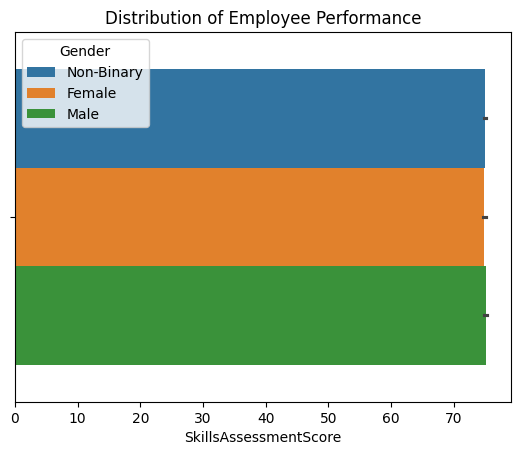

In [232]:
#Distribution of employee performance by using skillsassessmentscore
sns.barplot(x="SkillsAssessmentScore",hue="Gender", data=df)
plt.title("Distribution of Employee Performance")
plt.show()


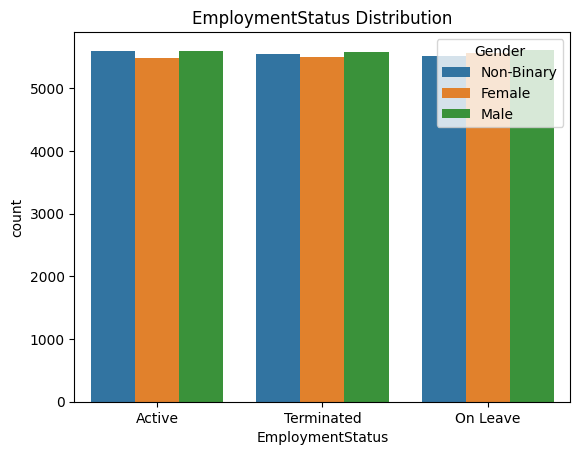

In [233]:
sns.countplot(x='EmploymentStatus',hue="Gender",data=df)
plt.title('EmploymentStatus Distribution')
plt.show()

Text(0.5, 1.0, 'Department vs Salary')

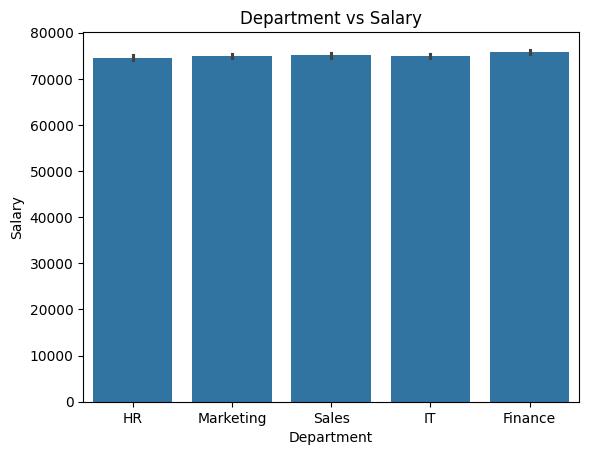

In [234]:
sns.barplot(x="Department",y="Salary",data=df)
plt.title("Department vs Salary")


In [235]:
df.head()

,Gender,Department,JobTitle,EmploymentStatus,ProjectsAssigned,ProjectsCompleted,PerformanceRating,Salary,Bonus,YearsAtCompany,...,PerformanceImprovementPlan,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
0,Non-Binary,HR,Sales promotion account executive,Active,16,5,3,93343.46,832.30,5,...,No,1.45,Low,Non-Diverse,50.26,1152.71,14,Yes,50,6.63
1,Non-Binary,HR,Sales executive,Terminated,16,17,4,73427.36,3257.50,5,...,No,1.40,Medium,Diverse,97.90,2810.24,23,Yes,50,5.68
2,Female,Marketing,"Research officer, trade union",Active,9,4,5,61139.49,15121.63,7,...,Yes,4.46,Medium,Non-Diverse,78.61,5945.55,39,No,55,8.51
3,Non-Binary,Marketing,Soil scientist,On Leave,14,11,4,35649.67,6889.36,2,...,Yes,1.09,Medium,Non-Diverse,95.29,7837.52,25,Yes,56,3.34
4,Non-Binary,HR,Automotive engineer,Active,4,4,3,57320.06,11421.73,10,...,Yes,3.21,High,Diverse,70.09,1638.29,46,No,57,3.34


# **MODEL BUILDING AND EVALUATION**

In [236]:
x=df[["PerformanceRating"]]
y = df["PerformanceRating"]

In [237]:
le1=LabelEncoder()
df['Gender']=le1.fit_transform(df['Gender'])

le2=LabelEncoder()
df["Department"]=le2.fit_transform(df["Department"])

le3=LabelEncoder()
df["JobTitle"]=le3.fit_transform(df["JobTitle"])

le4=LabelEncoder()
df['EmploymentStatus']=le4.fit_transform(df['EmploymentStatus'])

le5=LabelEncoder()
df["HireSource"]=le5.fit_transform(df["HireSource"])

le6=LabelEncoder()
df["PerformanceImprovementPlan"]=le6.fit_transform(df["PerformanceImprovementPlan"])

le7=LabelEncoder()
df["RetentionRisk"]=le7.fit_transform(df["RetentionRisk"])

le8=LabelEncoder()
df["DiversityCategory"]=le8.fit_transform(df["DiversityCategory"])

le9=LabelEncoder()
df["InternalPromotion"]=le9.fit_transform(df["InternalPromotion"])




In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [239]:
#x_test = df.loc[y_test.index, x.columns] # assuming df is the original dataframe


In [240]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


# **MACHINE LEARNING PREDICTION**

In [241]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [242]:
x.head()

,PerformanceRating
0,3
1,4
2,5
3,4
4,3


In [243]:
y_pred=model.predict(x_test)
y_pred

array([5., 5., 1., ..., 5., 1., 1.])

In [244]:
y_test

,PerformanceRating
33553,5
9427,5
199,1
12447,3
39489,2
...,...
28567,3
25079,1
18707,5
15200,1


In [245]:
score=r2_score(y_test,y_pred)
score

1.0

In [246]:
mse=mean_squared_error(y_test,y_pred)
mse

2.925614912604695e-29

In [247]:
model2=RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [248]:
y_pred2=model2.predict(x_test)
y_pred2

array([5., 5., 1., ..., 5., 1., 1.])

In [249]:
score2=r2_score(y_test,y_pred2)
score2

1.0

In [250]:
mse=mean_squared_error(y_test,y_pred2)
mse

0.0

In [251]:
x.head()

,PerformanceRating
0,3
1,4
2,5
3,4
4,3


In [253]:
df.columns


Index(['Gender', 'Department', 'JobTitle', 'EmploymentStatus',
       'ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary',
       'Bonus', 'YearsAtCompany', 'HireSource', 'EmployeeEngagementScore',
       'PerformanceImprovementPlan', 'JobSatisfactionScore', 'RetentionRisk',
       'DiversityCategory', 'SkillsAssessmentScore', 'RecruitmentCost',
       'TimeToFillPosition', 'InternalPromotion', 'WorkHoursPerWeek',
       'StressLevelScore'],
      dtype='object')

In [257]:
# User input for prediction
Gender=input("Enter the Gender:")
Department=input("Enter the Department:")
JobTitle=input("Enter the JobTitle:")
EmploymentStatus=input("Enter the EmploymentStatus:")
ProjectsAssigned=int(input("Enter the ProjectsAssigned:"))
ProjectsCompleted=int(input("Enter the ProjectsCompleted:"))
Salary=float(input("Enter the Salary:"))
Bonus=float(input("Enter the Bonus:"))
YearsAtCompany=int(input("Enter the YearsAtCompany:"))
HireSource=input("Enter the HireSource:")
EmployeeEngagementScore=float(input("Enter the EmployeeEngagaementScore:"))
JobSatisfactionScore=float(input("Enter the JobSatisfactionScore:"))
RetentionRisk=input("Enter the RetentionRisk:")
DiversityCategory=input("Enter the DiversityCategory:")
SkillsAssessmentScore=float(input("Enter the SkillsAssessmentScore:"))
RecruitmentCost=float(input("Enter the RecruitmentCost:"))
TimeToFillPosition=int(input("Enter the TimeToFillPosition:"))
InternalPromotion=input("Enter the InternalPromotion:")
WorkHoursPerWeek=int(input("Enter the WorkHoursPerWeek:"))
StressLevelScore=float(input("Enter the StressLevelScore:"))
PerformanceImprovementPlan=input("Enter the PerformanceImprovementPlan:")  # Update the prompt to request all features:")


Gender=le1.transform([Gender])[0]
Department=le2.transform([Department])[0]
JobTitle=le3.transform([JobTitle])[0]
EmploymentStatus=le4.transform([EmploymentStatus])[0]
HireSource=le5.transform([HireSource])[0]
PerformanceImprovementPlan=le6.transform([PerformanceImprovementPlan])[0]
RetentionRisk=le7.transform([RetentionRisk])[0]
DiversityCategory=le8.transform([DiversityCategory])[0]
InternalPromotion=le9.transform([InternalPromotion])[0]


user_values=np.array([[Gender,Department,JobTitle,EmploymentStatus,ProjectsAssigned,ProjectsCompleted,Salary,Bonus,YearsAtCompany,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore]])
user_values



Enter the Gender:Female
Enter the Department:Marketing
Enter the JobTitle:Research officer, trade union
Enter the EmploymentStatus:Active
Enter the ProjectsAssigned:9
Enter the ProjectsCompleted:4
Enter the Salary:61139.49
Enter the Bonus:15121.63
Enter the YearsAtCompany:6
Enter the HireSource:Job Board
Enter the EmployeeEngagaementScore:4.5
Enter the JobSatisfactionScore:4.46
Enter the RetentionRisk:Medium
Enter the DiversityCategory:Non-Diverse
Enter the SkillsAssessmentScore:78.61
Enter the RecruitmentCost:5945.55
Enter the TimeToFillPosition:39
Enter the InternalPromotion:No
Enter the WorkHoursPerWeek:55
Enter the StressLevelScore:8.51
Enter the PerformanceImprovementPlan:Yes


array([[0.000000e+00, 3.000000e+00, 5.060000e+02, 0.000000e+00,
        9.000000e+00, 4.000000e+00, 6.113949e+04, 1.512163e+04,
        6.000000e+00, 4.460000e+00, 2.000000e+00, 1.000000e+00,
        7.861000e+01, 5.945550e+03, 3.900000e+01, 0.000000e+00,
        5.500000e+01, 8.510000e+00]])

In [262]:
user_values = np.array([[SkillsAssessmentScore]])

In [265]:
#make prediction
prediction=model2.predict(user_values)
print(prediction)

if prediction[0]==0:
  print("Poor")
else:
  print("Excellent")

[5.]
Excellent


In [266]:
#print the prediction
print("Predicted Output:",prediction[0])

Predicted Output: 5.0


# **Insights & Business Impact**

By predicting performance ratings, HR teams can:

Identify high-potential employees for promotions.

Improve training programs for low performers.

Optimize hiring strategies based on predictive insights.

# **CONCLUSION**

Males have the better Performance Rating based on Gender.

Females from Finanace Department have high Skills Assessment Score.

Recruitment Consultant have overtime working hours.

Finance Department has the highest teamsize.